<a href="https://colab.research.google.com/github/udtmhr/tensorflow/blob/main/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.12.0


In [23]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [24]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [25]:
train_images.shape

(60000, 28, 28)

In [26]:
len(train_labels)

60000

In [27]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [28]:
test_images.shape

(10000, 28, 28)

In [29]:
len(test_labels)

10000

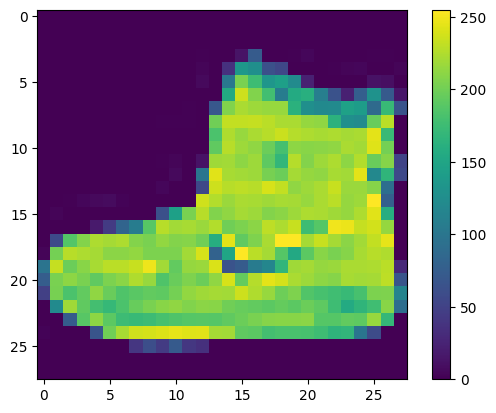

In [30]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [31]:
train_images = train_images / 255.0
test_images = test_images / 255.0

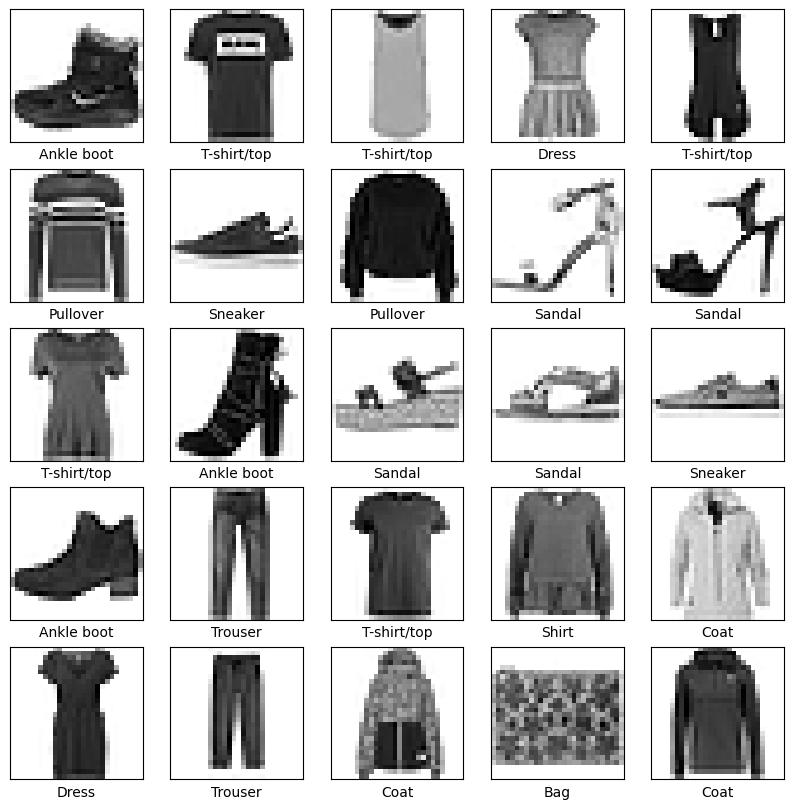

In [32]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [38]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [39]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [40]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 11s 3ms/step - loss: 0.5032 - accuracy: 0.8239
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3805 - accuracy: 0.8629
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3410 - accuracy: 0.8763
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3165 - accuracy: 0.8847
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2966 - accuracy: 0.8898
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2817 - accuracy: 0.8964
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2682 - accuracy: 0.9001
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2588 - accuracy: 0.9037
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2490 - accuracy: 0.9075
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.23

In [41]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("\nTest accuracy:", test_acc)

313/313 - 1s - loss: 0.3355 - accuracy: 0.8839 - 685ms/epoch - 2ms/step

Test accuracy: 0.883899986743927


In [43]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [44]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 1ms/step


In [45]:
predictions[0]

array([3.7567702e-08, 5.2994364e-10, 3.0326816e-10, 2.6679331e-10,
       8.6085512e-09, 1.5097642e-02, 6.1814049e-08, 1.1484470e-02,
       2.7256394e-07, 9.7341758e-01], dtype=float32)

In [48]:
np.argmax(predictions[0])

9

In [49]:
test_labels[0]

9

In [51]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

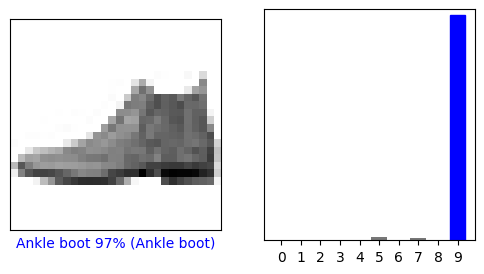

In [52]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

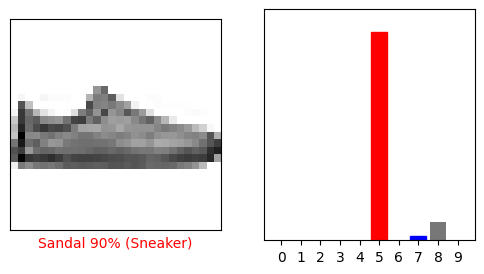

In [53]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

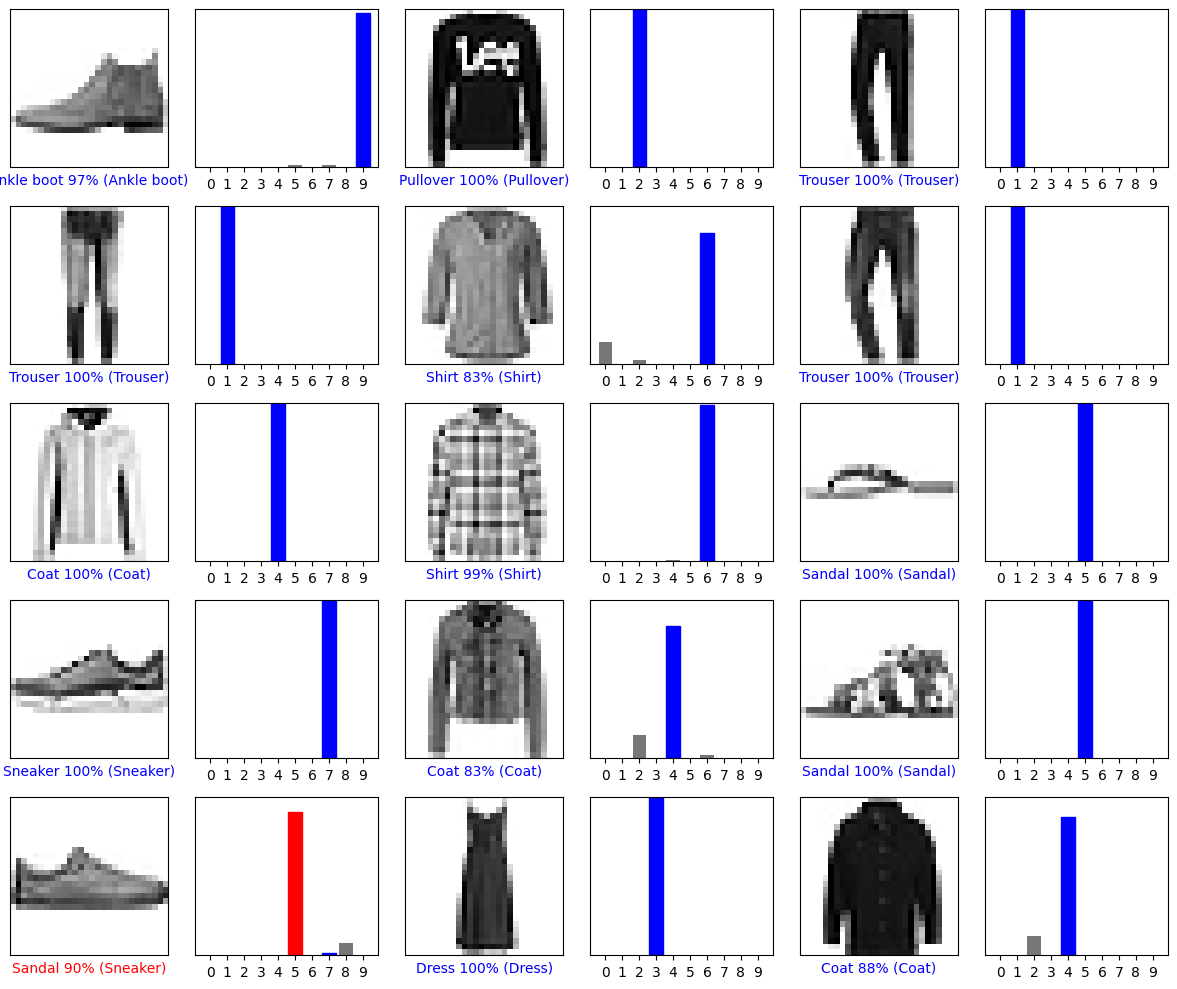

In [54]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [55]:
img = test_images[1]
print(img.shape)

(28, 28)


In [56]:
img = (np.expand_dims(img, 0))
print(img.shape)

(1, 28, 28)


In [57]:
predictions_single = probability_model.predict(img)
print(predictions_single)

1/1 [==============================] - 0s 93ms/step
[[1.7535905e-06 3.5526223e-13 9.9825829e-01 1.6665608e-10 1.1337284e-03
  1.5722530e-10 6.0622970e-04 9.3647519e-17 4.5614880e-11 2.0214268e-16]]


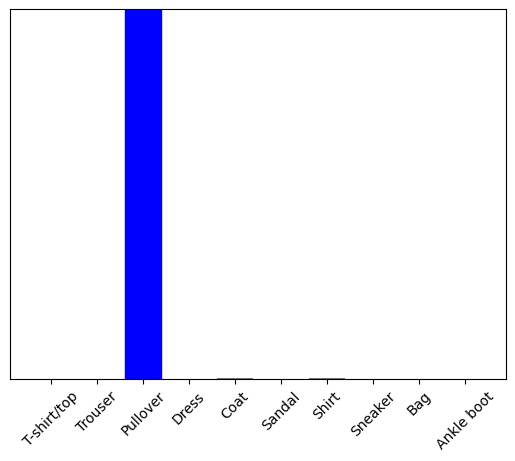

In [58]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [59]:
np.argmax(predictions_single[0])

2